# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [185]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

In [186]:
import warnings
warnings.filterwarnings("ignore")

### Understanding the structure of the data

In [187]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [188]:
df.shape

(1898, 9)

#### Observations:


#Data has 1898 rows and 9 colons

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [190]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

#Total of 9 colons, has 4 integer Dtypes, 4 Object Dtypes, and 1 float
#1898 non-null counts on all 9 colons
#Memory usage 133.6+ KB

### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [191]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
for col in ['restaurant_name','cuisine_type','day_of_the_week']:
    df[col]= df[col].astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [192]:
df.describe()# Write your code here

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Time taken for food to be prepared: Minimum-20minutes, Average time- 27 minutes, and maximum time-35 minutes.
   Food cost ranges from $4.47 to $35.41 with an average of $16.50
    Delivery time is from 15 to 33 minutes after food is prepared, with an average of 24.16minutes.
    50% of food preparation time and delvery time is closer to the max time than the min meaning the data is negatively skewed

### **Question 5:** How many orders are not rated? [1 mark]

In [193]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 
736 order are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [194]:
def histogram_boxplot(data, feature,figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2,ax_hist2)=plt.subplots(nrows=2,gridspec_kw={"height_ratios":(0.25,0.75)},
    figsize=figsize,)
    sns.boxplot(data=data,x=feature,ax=ax_box2, showmeans=True, color="yellow")
    sns.histplot(data=data,x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    ax_hist2.axvline(data[feature].mean(),color="green",linestyle="--")
    ax_hist2.axvline(data[feature].median(),color="black",linestyle="-")

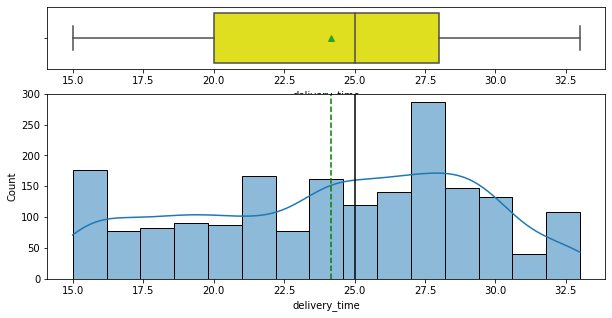

In [195]:
histogram_boxplot(df,'delivery_time',figsize=(10,5),kde=True, bins=15)

delivery time seems to be skewed to the left. with the most count at about 27 minutes

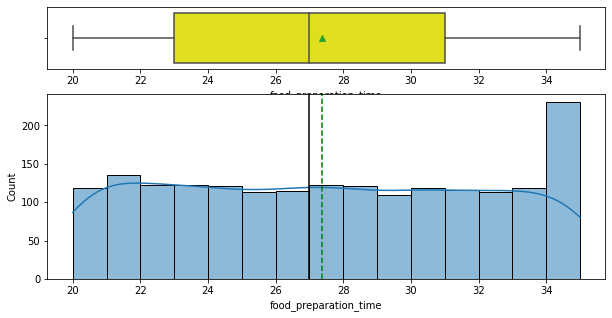

In [196]:
histogram_boxplot(df,'food_preparation_time',figsize=(10,5),kde=True, bins=15)

Food Preparation time is largely even.
the mean and median are close, because there are no outliers

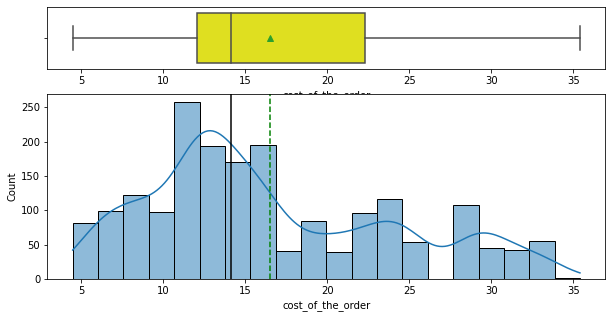

In [197]:
histogram_boxplot(df,'cost_of_the_order',figsize=(10,5),kde=True, bins=20)

The highier the cost, the lower the number of orders made.

In [198]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 
        ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
    plt.show()

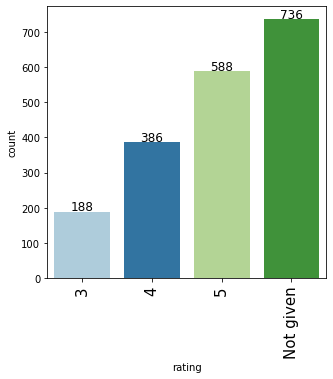

In [199]:
labeled_barplot(df, 'rating')

Ratings: Most of the ratings are not given
    With 5 having the most ratings it can be assumed that people rate more when they are satisfied
    it can also be assumed that restaurants in review are good.

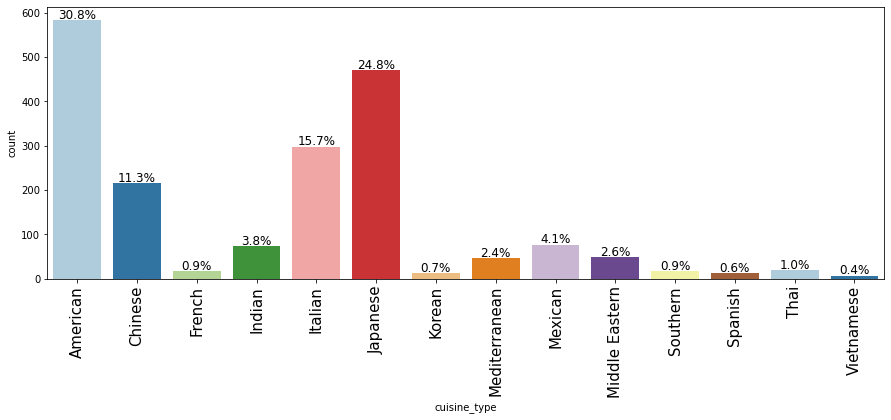

In [200]:
labeled_barplot(df,'cuisine_type', perc=True)

Cuisine Type: American is the most popular followed by Japanese, Italian and Chinese.

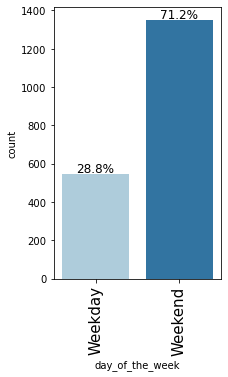

In [201]:
labeled_barplot(df,'day_of_the_week', perc=True)



Day of the week: 71% of food is ordered on weekends

In [202]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [203]:
df.groupby('restaurant_name',as_index=False)['order_id'].count().nlargest(5,'order_id')  # Write the code here

,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


#### Observations:
The top 5 restaurants in terms of numbers of orders are: 
    Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Pam

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [204]:
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()# Write the code here

day_of_the_week                
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
The most popular cuisine on weekends is: American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [205]:
df.shape[0]

1898

In [206]:
above_20 = df[df['cost_of_the_order'] > 20]
perc= (above_20.shape[0] / df.shape[0]) * 100
print("Percentage:", round(percentage, 2),'%') #Write the code here

Percentage: 29.24 %


#### Observations:
The percentage of orders that cost more than $20 = 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [207]:
df['delivery_time'].mean()# Write the code here

24.161749209694417

#### Observations:
The mean order delivery time is 24 minutes, 16 seconds

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [208]:
df.groupby('customer_id',as_index=False)['order_id'].count().nlargest(5,'order_id')

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7


#### Observations:
The top 5 most frequent customers have the following customer IDs:52832, 47440, 83287, 250494,65009.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<AxesSubplot:xlabel='cost_of_the_order', ylabel='cuisine_type'>

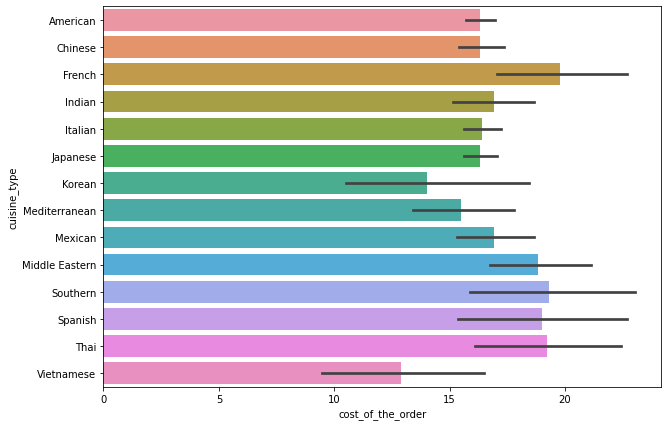

In [209]:
 plt.figure(figsize=(10,7))
sns.barplot (x='cost_of_the_order',y='cuisine_type', data=df, label='blue')

Cuisine Types vs Cost of the Order:
    Korean and Vetnamese cuisine are significantly cheaper than other cuisines
    French, southern and Thai cuisine are highier priced than others
    Middle eastern and spanish cuisines are closely matched to the highier priced cuisines.
    American, chinese, Italian and Jananese cuisines are about the same price range.

<AxesSubplot:xlabel='food_preparation_time', ylabel='cuisine_type'>

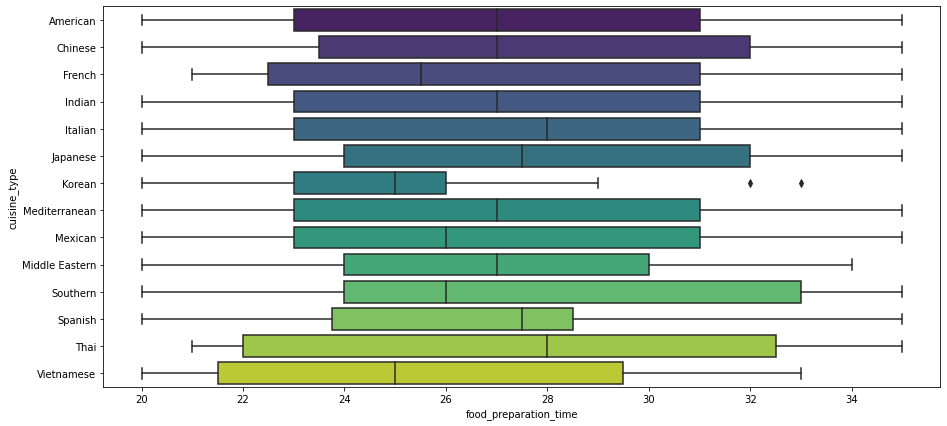

In [210]:
 plt.figure(figsize=(15,7))
sns.boxplot (x='food_preparation_time',y='cuisine_type', data=df, palette = 'viridis')

Food Preparation time vs Cuisine Type:
    Korean and Vietnamese cuisine have relatively shorter mean preparation time
    American, Indian, mediterranian, Chinese and middle eastern have similar average peaparation time.
    Korean cuisine have outliers.
    Southern cuisine have an average shorter time but can take the longest 75 percentile of timr to be ready.

<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

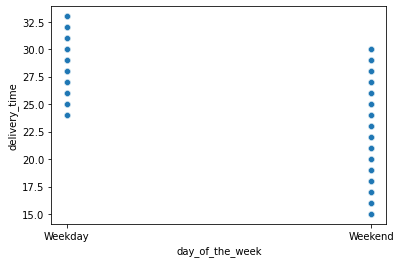

In [211]:
sns.scatterplot(x='day_of_the_week', y='delivery_time', data=df)

Delivery time vs Days of the week:
    Delivery time on weekends is significantly shorter than on weekdays

<AxesSubplot:xlabel='food_preparation_time', ylabel='rating'>

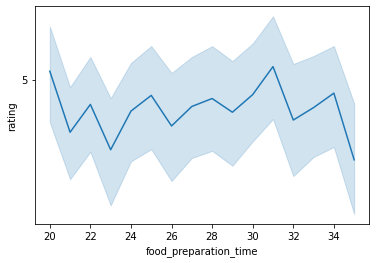

In [212]:
sns.lineplot (x='food_preparation_time',y='rating', data=df, palette = 'viridis')

Rating VS Food preparation time:
    We can observe that the extremes of short food preparation time and 
    long food preparation time has a direct effect on the restaurant rating
Possibly other factors influence the periods inbetween. 

<AxesSubplot:xlabel='food_preparation_time', ylabel='delivery_time'>

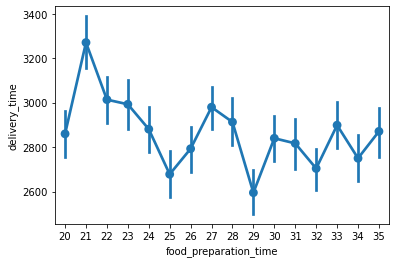

In [213]:
sns.pointplot(x='food_preparation_time',y='delivery_time',data=df,estimator=sum)

Delivery time VS Food Preparation time.
    I observed that the earlier food preparation time has positive correlation with delivery time, 
    possibly because traffic is lighter at certain times in the day
    Delivery time fluctuates in the course of the day

<AxesSubplot:xlabel='day_of_the_week', ylabel='cost_of_the_order'>

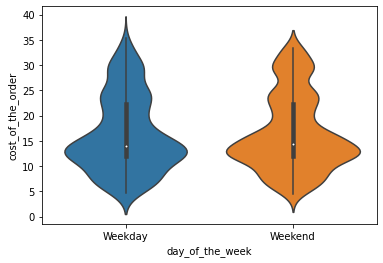

In [214]:
sns.violinplot(x='day_of_the_week', y='cost_of_the_order', data=df)

 Cost of the order VS Day of the week
    There is no significant difference in pricing on weekdays and on weekends.

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

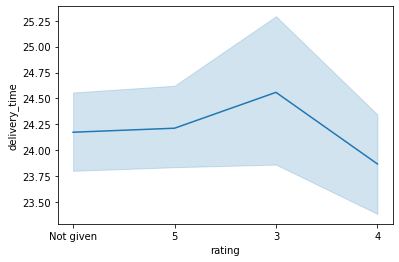

In [215]:
sns.lineplot(x='rating', y='delivery_time', data=df)

Delivery Time VS Rating:
    Delivery time seems to have a subtle influence on ratings

<AxesSubplot:xlabel='rating', ylabel='cost_of_the_order'>

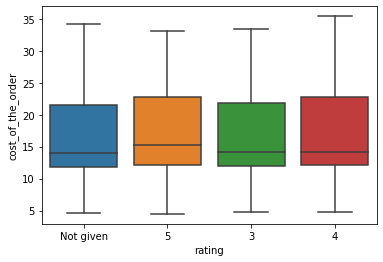

In [216]:
sns.boxplot(x='rating', y='cost_of_the_order', data=df)

Cost of Order VS Rating
Seems the higher ratings are slightly better with the highier cost of the order. 
Could be that more expensive cuisine are better prepared and delivered

<AxesSubplot:>

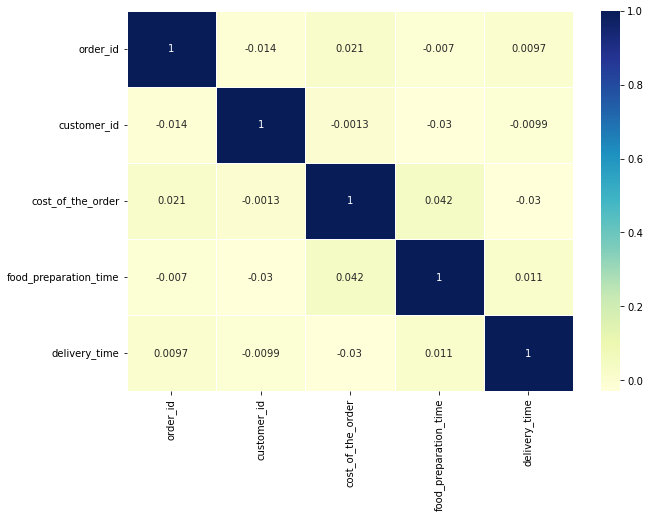

In [217]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=.6)

The highiest correlations are between the cost of orders and revenue
Followed by Food preparation time, delivery time and total order time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [218]:
rate = df[df['rating'] != 'Not given'].copy()
rate['rating'] = rate['rating'].astype('int')
r_count = rate.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count
restaurant = r_count[r_count['rating'] > 50]['restaurant_name']
avr_r = rate[rate['restaurant_name'].isin(restaurant)].copy()
avr_r.groupby(avr_r['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178
4,'wichcraft,NaN
...,...,...
173,Zero Otto Nove,NaN
174,brgr,NaN
175,da Umberto,NaN
176,ilili Restaurant,NaN


#### Observations:
Restaurants fufilling the criteria are: The meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, Blue Ribbon Sushi.

# **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [219]:
def rev_gen(a):
    if a > 20:
        return a*0.25
    elif a > 5:
        return a*0.15
    else:
        return a*0

df['Net_Revenue'] = df['cost_of_the_order'].apply(rev_gen)
total = df['Net_Revenue'].sum()
print('The net revenue generated($)', round(total_rev, 2))

The net revenue generated($) 6166.3


#### Observations:
About $6,166 was generated by the company from the restaurants

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [220]:
df['total_order_time'] = df['food_preparation_time'] + df['delivery_time']

print ('Total Order TIme > 60 minutes % =',round(df[df['total_order_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

Total Order TIme > 60 minutes % = 10.54 %


#### Observations:
Only 10.5% of orders take more than a total time of 60 minutes to deliver

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [221]:
print(round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes on weekdays')

28 minutes on weekdays


In [222]:
print(round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes on weekends')

22 minutes on weekends


#### Observations:
The mean delivery time is lower on weekend
food is delivered quicker on weekends with an average of about 6 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
Conclusions:
   82.6% of all orders come from the top 4 cuisine types: American, Japanes, Italian and Chinese.
    71% of orders are made on weekends
    cost of orders have the highiest correlation with revenue.
    Korean and Viernamese cuisines have the shortest preparation time
    French cuisine are the most expensive


Recommendations:
    The business can increase its capacity to deliver American, Japanes, Italian and Chinese cuisine as they have the highiest orders
    Work on reducing total delivery time as it affects ratings.
    
    70% of orders are made on weekends, so the business should optimize its manpower to be able to cater for the demand.
    
    Leverage on good quality as highier ratings have come from cuisine with highier cost.
    
    Do more promotional activities with the highiest ordering customers and restaurants to drive increase in orders.